<a href="https://colab.research.google.com/github/pascal-maker/machinelearning/blob/main/Example_Simple_Linear_Regression_Blood_Pressure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict blood pressure based on weight and age

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import style
from sklearn import datasets, linear_model

In [ ]:
# Load dataset
data_bd = pd.read_csv('bloodpressure.csv')

In [ ]:
# Dimension of the dataset
print(data_bd.shape)

(11, 3)


In [ ]:
# Show the first rows of the dataset
data_bd.head(11)

,age,weight,bloodpressure
0,52,78,136
1,59,83,143
2,67,88,153
3,73,96,162
4,64,89,161
5,74,103,171
6,54,85,137
7,61,85,149
8,65,94,162
9,46,76,128


In [ ]:
# Statistical properties
data_bd.describe()

,age,weight,bloodpressure
count,11.000000,11.000000,11.000000
mean,62.454545,88.636364,151.636364
std,9.114424,8.417514,14.087390
min,46.000000,76.000000,128.000000
25%,56.500000,84.000000,140.000000
50%,64.000000,88.000000,153.000000
75%,69.500000,95.000000,162.000000
max,74.000000,103.000000,171.000000


In [ ]:
# Correlations
data_bd.corr()

,age,weight,bloodpressure
age,1.000000,0.936927,0.955477
weight,0.936927,1.000000,0.947494
bloodpressure,0.955477,0.947494,1.000000


Berekent de Pearson correlatiematrix om de lineaire relaties tussen de variabelen te beoordelen.



<Axes: title={'center': 'Blood pressure as a function of the weight'}, xlabel='weight', ylabel='bloodpressure'>

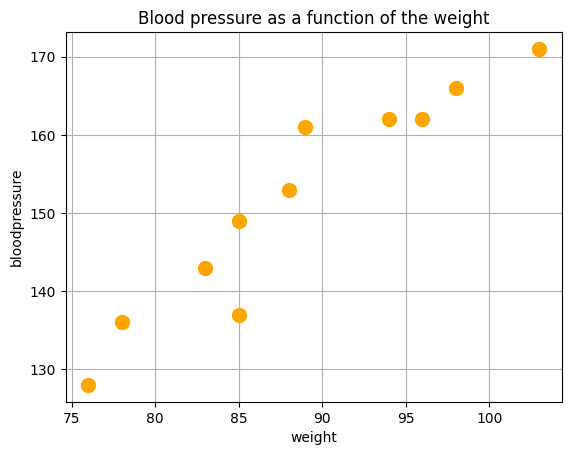

In [ ]:
# Scatterplot weight - blood pressure
data_bd.plot(kind='scatter',x='weight',y='bloodpressure',title='Blood pressure as a function of the weight',grid=True,s=100,color='orange')

Maakt een scatterplot van weight tegen bloodpressure met oranje punten.

Helpt om visueel de relatie tussen gewicht en bloeddruk te beoordelen

<Axes: title={'center': 'Blood pressure as a function of the age'}, xlabel='age', ylabel='bloodpressure'>

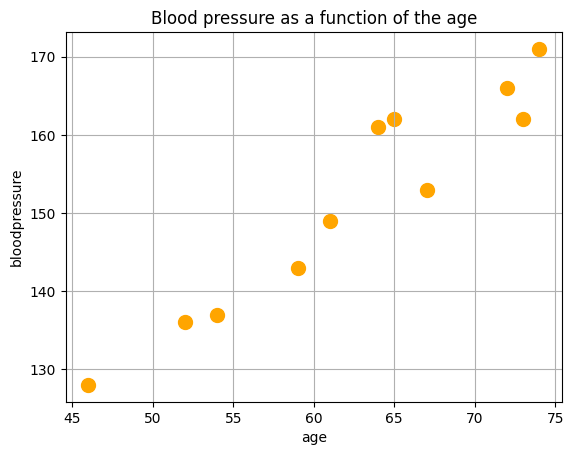

In [ ]:
# Scatterplot age - blood pressure
data_bd.plot(kind='scatter',x='age',y='bloodpressure',title='Blood pressure as a function of the age',grid=True,s=100,color='orange')

Maakt een scatterplot van age tegen bloodpressure met dezelfde stijl als de vorige plot.

In [ ]:
# Split into features and targets
features = list(data_bd.columns[:2])
print(features)
X = data_bd[features].values
y= data_bd['bloodpressure'].values
#-----------------


['age', 'weight']


features: Lijst met de eerste twee kolomnamen (age en weight).

X: Matrix met alleen de age en weight kolommen als input.

y: Vector met de doelvariabele bloodpressure.

teta0=  [59.40347997]
teta1= [[1.47680018]]


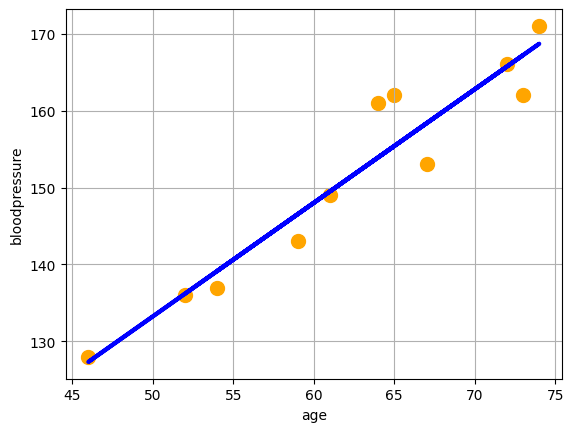

In [ ]:
# Linear regression model (between age and blood pressure)

ages = X[:,0].reshape(-1,1)

clf_age = linear_model.LinearRegression()
clf_age.fit(ages,y.reshape(-1,1))

data_bd.plot(kind='scatter',x='age',y='bloodpressure',s=100,grid=True,color='orange')
plt.plot(ages,clf_age.predict(ages), color='blue',linewidth=3)
print('teta0= ',clf_age.intercept_)
print('teta1=' ,clf_age.coef_)

Ages: Pakt alleen de leeftijdskolom (X[:,0]).

clf_age: Past lineaire regressie toe op age en bloodpressure.

Plot de regressielijn bovenop de scatterplot van leeftijd en bloeddruk.

In [ ]:
# Predict the blood pressure of 72 year old patient
print('Predicted blood pressure= ',clf_age.predict([[72]]))
print('teta0= ',clf_age.intercept_)
print('teta1=' ,clf_age.coef_)
print()
print('Blood pressure =', clf_age.coef_[0,0] ,' * age +', clf_age.intercept_[0])


Predicted blood pressure=  [[165.73309258]]
teta0=  [59.40347997]
teta1= [[1.47680018]]

Blood pressure = 1.4768001750930182  * age + 59.40347997373604


Drukt de intercept (teta0) en helling (teta1) van het model af.

Voorspelt de bloeddruk voor een 72-jarige patiënt.

teta0=  [11.08506543]
teta1= [[1.58570695]]

bloodpressure = 1.5857069540672306 * weight + 11.085065434949996


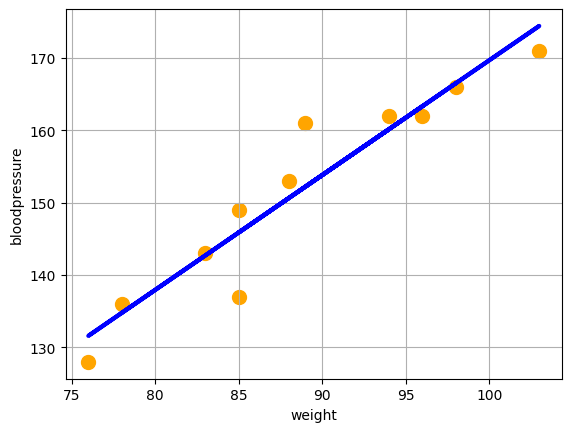

In [ ]:
# Linear regression model (between weight and blood pressure)

weights = X[:,1].reshape(-1,1)

clf_weight = linear_model.LinearRegression()
clf_weight.fit(weights,y.reshape(-1,1))
data_bd.plot(kind='scatter',x='weight',y='bloodpressure',s=100,grid=True,color='orange')
plt.plot(weights,clf_weight.predict(weights), color='blue',linewidth=3)
print('teta0= ',clf_weight.intercept_)
print('teta1=' ,clf_weight.coef_)
print()
print('bloodpressure =', clf_weight.coef_[0,0] ,'* weight +', clf_weight.intercept_[0])

Weights: Pakt alleen de gewichten kolom (X[:,1]).

clf_weight: Past lineaire regressie toe op weight en bloodpressure.

Plot de regressielijn bovenop de scatterplot van gewicht en bloeddruk.

In [ ]:
# Predict the blood pressure of a patient with a weight of 91 kg

print('Predicted blood pressure= ',clf_weight.predict([[91]]))
print('teta0= ',clf_weight.intercept_)
print('teta1=' ,clf_weight.coef_)

print('Blood pressure =', clf_weight.coef_[0,0] ,'* weight +', clf_weight.intercept_[0])

Predicted blood pressure=  [[155.38439826]]
teta0=  [11.08506543]
teta1= [[1.58570695]]
Blood pressure = 1.5857069540672306 * weight + 11.085065434949996


Drukt de intercept (teta0) en helling (teta1) van het model af.

Voorspelt de bloeddruk voor een patiënt met een gewicht van 91

In [ ]:
# Linear model on both of the features age and weight

clf = linear_model.LinearRegression()
clf.fit(X,y)

print('theta0= ',clf.intercept_)
print('theta1=' ,clf.coef_[0])
print('theta2=' ,clf.coef_[1])
print()
print('Blood pressure =', clf.coef_[0] ,'* age +', clf.coef_[1] ,'* weight +',clf.intercept_)

theta0=  34.62648847714202
theta1= 0.8570834381593772
theta2= 0.7161972356266109

Blood pressure = 0.8570834381593772 * age + 0.7161972356266109 * weight + 34.62648847714202


Bouwt een lineair model met zowel age als weight als inputkenmerken.

Drukt de intercept (theta0) en coëfficiënten (theta1 en theta2) af voor beide kenmerken.

In [ ]:
# Predict blood pressure: age = 24 years, weight = 86 kg

X_test = np.array([[24,86]])

print('Predicted blood pressure= ',clf.predict(X_test))
print()
print('Blood pressure =', clf.coef_[0] ,'* age +', clf.coef_[1] ,'* weight +',clf.intercept_)

Predicted blood pressure=  [116.78945326]

Blood pressure = 0.8570834381593772 * age + 0.7161972356266109 * weight + 34.62648847714202


Cell 15: Voorspelling - Leeftijd en gewicht samen
python
Copy
Edit
X_test = np.array([[24,86]])

print('Predicted blood pressure= ',clf.predict(X_test))
Voorspelt de bloeddruk voor een patiënt van 24 jaar en 86 kg.

